Through the python function we believe the probability of more than 100 insurance claims by march 1st to be  0.10282220036453904


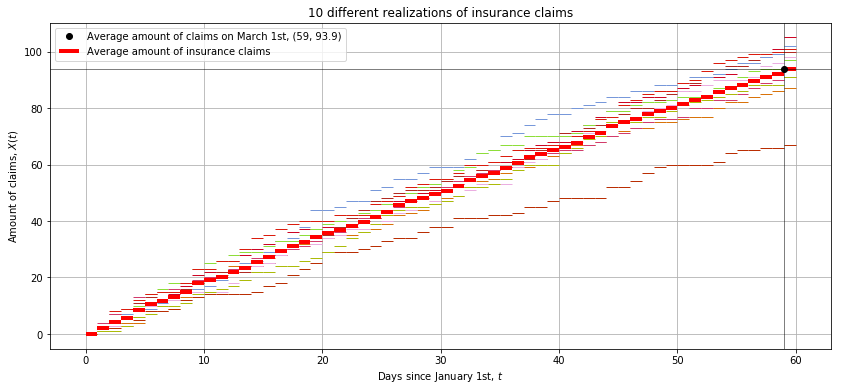

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics

#this is task 2a
parametre = 1.5

#using the cumulative function to find the probability of more than 100 insurance claims by march 1st
print("Through the python function we believe the probability of more than 100 insurance claims by march 1st to be ",1-stats.poisson.cdf(100,59*1.5))



n=np.linspace(0,100,101)

#function that makes a random walk that follows the poisson distribution
def make_poisson_list(mu,days):
    poiss_lst=[0]
    thesum=0
    for i in range(1,days+1):
        val1=np.random.poisson(mu)
        thesum+=val1
        poiss_lst.append(thesum)
    return poiss_lst

#function that plots the random walk of the poisson distribution, with 10 different realizations
def make_poisson_chart(mu,days):
    avg_lst=np.zeros(days+1)
    plt.figure(figsize=(14,6))
    for i in range(9):
        poiss_lst=make_poisson_list(mu,days)
        n=np.linspace(0,days,days+1)
        for i in range(1,days+1):
            avg_lst[i]+=poiss_lst[i]
        one_lst=np.ones(len(n))
        plt.hlines(poiss_lst,n,n+one_lst,linewidth=1,color=np.random.rand(1,3))
    poiss_lst=make_poisson_list(mu,days)
    n=np.linspace(0,days,days+1)
    for i in range(1,days+1):
        avg_lst[i]+=poiss_lst[i]
    one_lst=np.ones(len(n))
    plt.hlines(poiss_lst,n,n+one_lst,linewidth=1,color=np.random.rand(1,3))
    avg_lst=avg_lst*0.1
    plt.title("10 different realizations of insurance claims")
    plt.hlines(avg_lst,n,n+one_lst,"r",linewidth=4,label="Average amount of insurance claims")
    plt.plot(59,avg_lst[59],"ok",label="Average amount of claims on March 1st, ("+str(59)+", "+str(round(avg_lst[59],2))+")")
    plt.axhline(avg_lst[59],color="k",linewidth=0.5)
    plt.axvline(59,color="k",linewidth=0.5)
    plt.grid()
    plt.ylabel("Amount of claims, $X(t)$")
    plt.xlabel("Days since January 1st, $t$")
    plt.legend()
    plt.savefig('poissondistrib.pdf')
    plt.show()


make_poisson_chart(1.5,59)    




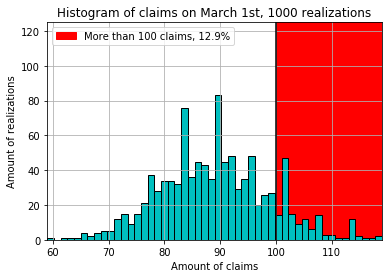

In [58]:
#this is also for task 2a
#plotting a histogram of the poisson graphs
#also 1000 realizations of the insurance claims, to find the mean and variance of claims sent on march 1st
march_lst=[]
outies=[]
for i in range(1000):
    poiss_lst=make_poisson_list(1.5,59)
    if poiss_lst[59]>100:
        outies.append(poiss_lst[59])
    march_lst.append(poiss_lst[59])
plt.title("Histogram of claims on March 1st, 1000 realizations")
plt.hist(march_lst,bins=50,color='c',edgecolor='k')
plt.fill_between([100,150],0,200,color='r',label="More than 100 claims, "+str(len(outies)/10)+"%")
plt.axvline(100,color='k')
plt.xlim(min(march_lst),max(march_lst))
plt.ylim(0,125)
plt.xlabel("Amount of claims")
plt.ylabel("Amount of realizations")
plt.grid()
plt.legend()
plt.savefig('march1hist.pdf')
plt.show()

In [62]:
#this is also a part of task 2a

#they want us to verify our results through 1000 simulations
#so basically they want us to simulate 1000 times how many claims march 1st will have
#we shall use the function make_poisson_list and iterate through it 1000 times
march_first_poiss=[]
for i in range(1000):
    poiss_lst=make_poisson_list(1.5,59)
    march_first_poiss.append(poiss_lst[59])
print("The mean is ",np.mean(march_first_poiss))

outlier_lst=[]
for i in march_first_poiss:
    if i>100:
        outlier_lst.append(i)
#finding a list of the times when there are more than 100 insurance claims by day 59

print("Probability of more than 100 insurance claims by march 1st is ", len(outlier_lst)/len(march_first_poiss))

The mean is  88.368
Probability of more than 100 insurance claims by march 1st is  0.106


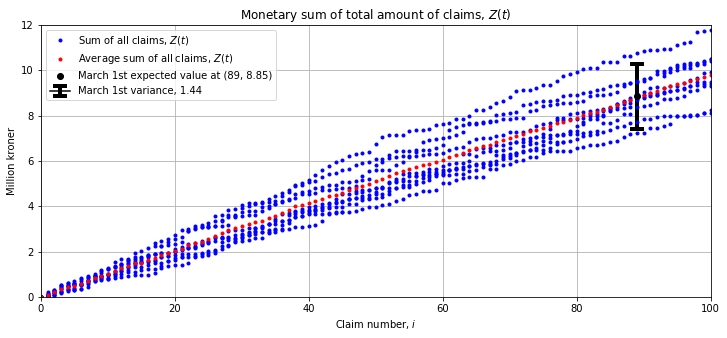

In [73]:
#task 2b

#monetary claim amounts exponentially distributed with lambda = 10
#monetary claims are also independent, and independent with each claim arrival
#the claim _amount_ is exponentially distributed to the nearest mill kroner, so that if i get
#0.2 from the exponential distribution it will be equivalent to 0.2 mill kroner
#find expected value and variance of claims at march 1st (59 days) through 1000 computer simulations

#making a function that returns a random walk according to the exponential distribution
def exp_claims(rate,amount):
    total_claims=0
    claim_list=[0]
    for i in range(amount):
        total_claims+=np.random.exponential(1/(rate))
        claim_list.append(total_claims)
    return claim_list

days=100

#plotting the total monetary claims according to claim number
def total_claim_plot(days):
    n=np.linspace(0,days,days+1)
    avg_list=np.zeros(days+1)
    plt.figure(figsize=(12,5))
    march_first_lst=[]
    mean_day=0
    for i in range(9):
        claims=exp_claims(10,days)
        plt.plot(n, claims, ".b")
        marchdate=np.random.poisson(88.5)
        mean_day+=marchdate
        march1st=claims[marchdate]
        march_first_lst.append(march1st)
        for i in range(days+1):
            avg_list[i]+=claims[i]
    claims=exp_claims(10,days)
    for i in range(days+1):
            avg_list[i]+=claims[i]
    avg_list=avg_list*0.1
    plt.plot(n, claims,".b", label="Sum of all claims, $Z(t)$")
    marchdate=np.random.poisson(88.5)
    mean_day+=marchdate
    mean_day = round(mean_day*0.1)
    march1st=claims[marchdate]
    march_first_lst.append(march1st)
    uncertainty=np.var(march_first_lst)
    mean_amt=np.mean(march_first_lst)
    plt.plot(n,avg_list,".r",label="Average sum of all claims, $Z(t)$")
    plt.title("Monetary sum of total amount of claims, $Z(t)$")
    plt.plot(mean_day,mean_amt,"ok",label="March 1st expected value at ("+str(mean_day)+", "+str(round(mean_amt,2))+")")
    plt.grid()
    plt.xlabel("Claim number, $i$")
    plt.ylabel("Million kroner")
    plt.errorbar(mean_day,mean_amt,yerr = uncertainty,color="k",label="March 1st variance, "+str(round(uncertainty,2)),capsize=7, 
    elinewidth=4,
    markeredgewidth=4)
    plt.xlim(0,100)
    plt.ylim(0,12)
    plt.legend()
    plt.savefig('totamt.pdf')
    plt.show()

total_claim_plot(300)

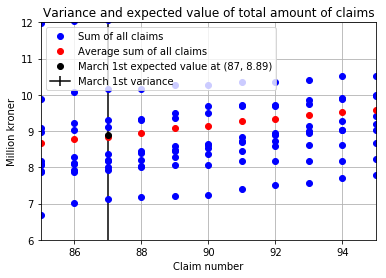

In [67]:
#plotting a visualization of the variance and mean on march 1st
#this is a part of 2b

def total_claim_zoom(days):
    n=np.linspace(0,days,days+1)
    avg_list=np.zeros(days+1)
    march_first_lst=[]
    mean_day=0
    for i in range(9):
        claims=exp_claims(10,days)
        plt.plot(n, claims, "bo")
        marchdate=np.random.poisson(88.5)
        mean_day+=marchdate
        march1st=claims[marchdate]
        march_first_lst.append(march1st)
        for i in range(days+1):
            avg_list[i]+=claims[i]
    claims=exp_claims(10,days)
    for i in range(days+1):
            avg_list[i]+=claims[i]
    avg_list=avg_list*0.1
    plt.plot(n, claims,"bo", label="Sum of all claims")
    marchdate=np.random.poisson(88.5)
    mean_day+=marchdate
    mean_day = round(mean_day*0.1)
    march1st=claims[marchdate]
    march_first_lst.append(march1st)
    uncertainty=np.var(march_first_lst)
    mean_amt=np.mean(march_first_lst)
    plt.title("")
    plt.title("Variance and expected value of total amount of claims")
    plt.plot(n,avg_list,"ro",label="Average sum of all claims")
    plt.plot(mean_day,mean_amt,"ok",label="March 1st expected value at ("+str(mean_day)+", "+str(round(mean_amt,2))+")")
    plt.errorbar(mean_day,mean_amt,yerr = uncertainty,color="k",label="March 1st variance")
    plt.grid()
    plt.xlabel("Claim number")
    plt.ylabel("Million kroner")
    plt.xlim(85,95)
    plt.ylim(6,12)
    plt.legend()
    plt.savefig('uncertainty_poiss.pdf')
    plt.show()
    
total_claim_zoom(300)

In [68]:
#this is for task 2b
#we just want to estimate the expectation and variance through 1000 computer simulations
#so maybe we don't even need graphs, but just our functions exp_claims


march_first_list=[]
#1000 simulations regarding the amount of claims for march 1st 
for i in range(1000):
    amt_claim=np.random.poisson(88.5)
    claim_list=exp_claims(10,amt_claim)
    march_first_list.append(claim_list[amt_claim])
print("The mean is ",np.mean(march_first_list))
print("The variance is ",np.var(march_first_list))

The mean is  8.858927807246346
The variance is  1.8005609527902808


In [54]:
#expected claim number for the poisson distribution is lambda*t
#this is used in task 1b

print("The expected number of claims following the poisson distribution would be",59*1.5)

The expected number of claims following the poisson distribution would be 88.5
